<a href="https://colab.research.google.com/github/ietsuka/weather_divide_ml/blob/main/weather_divide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sb

In [ ]:
df = pd.read_csv("./weather_classification_data.csv")
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


ここではdataTypeがobjectのカラムに対して整数ラベルを割り当て直している

In [ ]:
for col in df.select_dtypes(include='object').columns:
    categories, _ = pd.factorize(df[col])
    df[col] = categories

In [ ]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,1,0
13196,-1.0,76,3.5,23.0,3,1067.23,1,0,6.0,2,3
13197,30.0,77,5.5,28.0,2,1012.69,3,3,9.0,2,1
13198,3.0,76,10.0,94.0,2,984.27,0,0,2.0,0,3


In [ ]:
df.corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
Temperature,1.000000,-0.207969,-0.070022,-0.287206,-0.255247,0.209188,0.374773,0.379476,0.250751,0.189524,-0.407396
Humidity,-0.207969,1.000000,0.406079,0.638631,0.145574,-0.120653,-0.342694,-0.181043,-0.479969,-0.092175,-0.081860
Wind Speed,-0.070022,0.406079,1.000000,0.443770,0.101455,-0.077757,-0.068147,-0.047660,-0.311828,-0.031476,-0.172076
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,0.257138,-0.177444,-0.291601,-0.205374,-0.457444,-0.100080,-0.055412
Cloud Cover,-0.255247,0.145574,0.101455,0.257138,1.000000,-0.113061,-0.143955,-0.131479,-0.151395,-0.053803,0.056223
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,-0.113061,1.000000,0.154128,0.121566,0.120182,0.062520,-0.094754
UV Index,0.374773,-0.342694,-0.068147,-0.291601,-0.143955,0.154128,1.000000,0.203622,0.362922,0.090593,0.058527
Season,0.379476,-0.181043,-0.047660,-0.205374,-0.131479,0.121566,0.203622,1.000000,0.227055,0.155921,-0.382421
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,-0.151395,0.120182,0.362922,0.227055,1.000000,0.104598,0.012547
Location,0.189524,-0.092175,-0.031476,-0.100080,-0.053803,0.062520,0.090593,0.155921,0.104598,1.000000,-0.202935


In [ ]:
df.corr().style.background_gradient("summer_r")

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
Temperature,1.000000,-0.207969,-0.070022,-0.287206,-0.255247,0.209188,0.374773,0.379476,0.250751,0.189524,-0.407396
Humidity,-0.207969,1.000000,0.406079,0.638631,0.145574,-0.120653,-0.342694,-0.181043,-0.479969,-0.092175,-0.081860
Wind Speed,-0.070022,0.406079,1.000000,0.443770,0.101455,-0.077757,-0.068147,-0.047660,-0.311828,-0.031476,-0.172076
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,0.257138,-0.177444,-0.291601,-0.205374,-0.457444,-0.100080,-0.055412
Cloud Cover,-0.255247,0.145574,0.101455,0.257138,1.000000,-0.113061,-0.143955,-0.131479,-0.151395,-0.053803,0.056223
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,-0.113061,1.000000,0.154128,0.121566,0.120182,0.062520,-0.094754
UV Index,0.374773,-0.342694,-0.068147,-0.291601,-0.143955,0.154128,1.000000,0.203622,0.362922,0.090593,0.058527
Season,0.379476,-0.181043,-0.047660,-0.205374,-0.131479,0.121566,0.203622,1.000000,0.227055,0.155921,-0.382421
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,-0.151395,0.120182,0.362922,0.227055,1.000000,0.104598,0.012547
Location,0.189524,-0.092175,-0.031476,-0.100080,-0.053803,0.062520,0.090593,0.155921,0.104598,1.000000,-0.202935


In [ ]:
correlation_matrix = df.corr()
strong_correlation_cols = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['Weather Type', col]) >= 0.1 and col != 'Weather Type']
middle_correlation_cols = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['Weather Type', col]) >= 0.05 and col != 'Weather Type']

strong_correlation_cols
middle_correlation_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Cloud Cover',
 'Atmospheric Pressure',
 'UV Index',
 'Season',
 'Location']

ちょっと湿度(Humidity)・降水量(Precipitation)・雲量(Cloud Cover)の値が気になる

<Axes: ylabel='Humidity'>

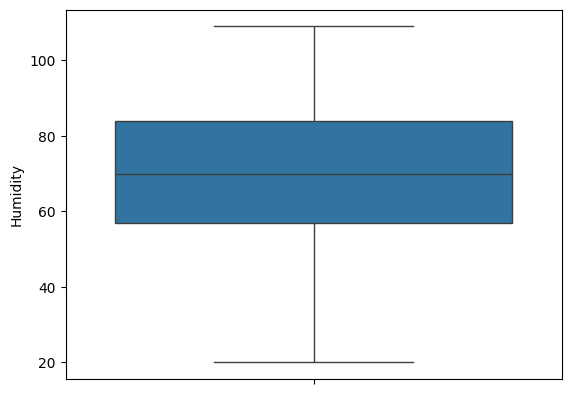

In [ ]:
sb.boxplot(df.Humidity)

In [ ]:
df.Humidity.max()

109

<ipython-input-20-880f13fc89ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df.Humidity, bins=20)


<Axes: xlabel='Humidity', ylabel='Density'>

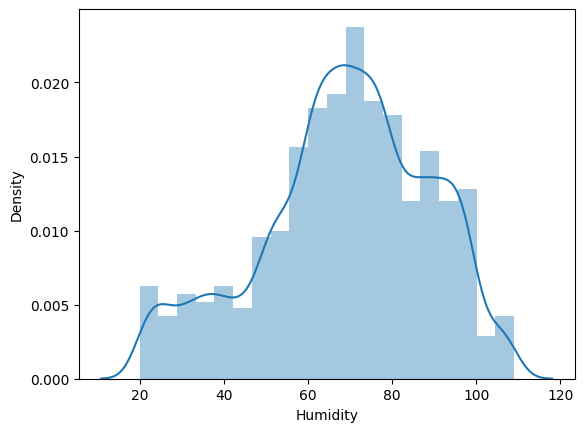

In [ ]:
sb.distplot(df.Humidity, bins=20)

In [ ]:
df.Humidity.value_counts().tail(15)

,count
Humidity,
29,63
32,61
45,60
27,59
106,57
28,55
108,52
105,50
104,50


ここで見える湿度においての傾向として  
湿度が100を超える値がいくつかあり  
外れ値が存在するということ

では次に降水量を見ていきます。

<Axes: ylabel='Precipitation (%)'>

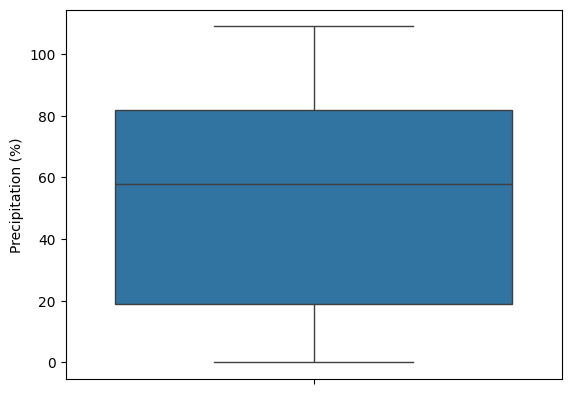

In [ ]:
sb.boxplot(df["Precipitation (%)"])

<ipython-input-27-bcb04ab10e59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["Precipitation (%)"], bins=20)


<Axes: xlabel='Precipitation (%)', ylabel='Density'>

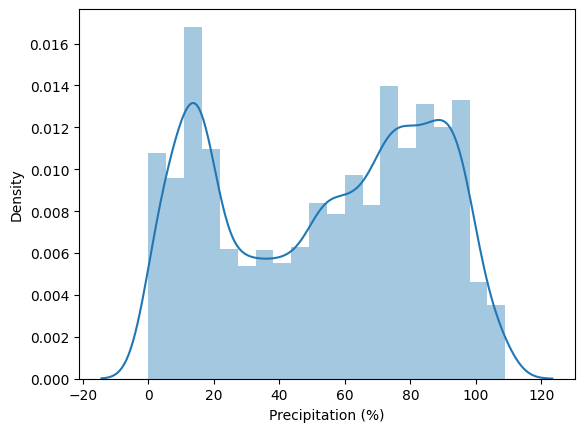

In [ ]:
sb.distplot(df["Precipitation (%)"], bins=20)

In [ ]:
df["Precipitation (%)"].max()

109.0

In [ ]:
df["Precipitation (%)"].min()

0.0

In [ ]:
df["Precipitation (%)"].value_counts().tail(15)

,count
Precipitation (%),
49.0,68
24.0,66
44.0,66
34.0,64
32.0,63
101.0,54
109.0,49
108.0,47
103.0,46


結果、降水確率もまた外れ値が存在することがわかった

では今から雲量も見ていく

<Axes: ylabel='Cloud Cover'>

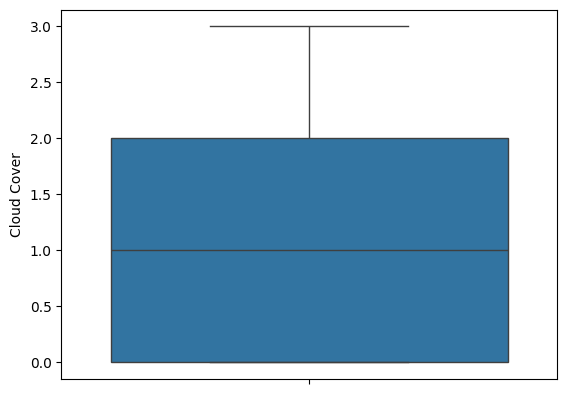

In [ ]:
sb.boxplot(df["Cloud Cover"])

雲量については特に問題がない

では、一旦湿度と降水量について外れ値があったものの対応を行う  
具体的な対応方法は  
グルーピングを行うように修正を行う

In [ ]:
df.Humidity.min()

20

In [ ]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,1,0
13196,-1.0,76,3.5,23.0,3,1067.23,1,0,6.0,2,3
13197,30.0,77,5.5,28.0,2,1012.69,3,3,9.0,2,1
13198,3.0,76,10.0,94.0,2,984.27,0,0,2.0,0,3


In [ ]:
df["Humidity_band"] = pd.cut(df["Humidity"], [20,40,60,80,109], labels=range(4), right=False)

In [ ]:
df["Precipitation_band"] = pd.cut(df["Precipitation (%)"], [0,20,40,60,80,109], labels=range(5), right=False)

In [ ]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Humidity_band,Precipitation_band
0,14.0,73,9.5,82.0,0,1010.82,2,0,3.5,0,0,2,4
1,39.0,96,8.5,71.0,0,1011.43,7,1,10.0,0,1,3,3
2,30.0,64,7.0,16.0,1,1018.72,5,1,5.5,1,2,2,0
3,38.0,83,1.5,82.0,1,1026.25,7,1,1.0,2,2,3,4
4,27.0,74,17.0,66.0,2,990.67,1,0,2.5,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,1,0,2,3
13196,-1.0,76,3.5,23.0,3,1067.23,1,0,6.0,2,3,2,1
13197,30.0,77,5.5,28.0,2,1012.69,3,3,9.0,2,1,2,1
13198,3.0,76,10.0,94.0,2,984.27,0,0,2.0,0,3,2,4


In [ ]:
df.corr().style.background_gradient("summer_r")

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Humidity_band,Precipitation_band
Temperature,1.000000,-0.207969,-0.070022,-0.287206,-0.255247,0.209188,0.374773,0.379476,0.250751,0.189524,-0.407396,-0.239768,-0.301364
Humidity,-0.207969,1.000000,0.406079,0.638631,0.145574,-0.120653,-0.342694,-0.181043,-0.479969,-0.092175,-0.081860,0.951135,0.629420
Wind Speed,-0.070022,0.406079,1.000000,0.443770,0.101455,-0.077757,-0.068147,-0.047660,-0.311828,-0.031476,-0.172076,0.389459,0.429640
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,0.257138,-0.177444,-0.291601,-0.205374,-0.457444,-0.100080,-0.055412,0.639245,0.981480
Cloud Cover,-0.255247,0.145574,0.101455,0.257138,1.000000,-0.113061,-0.143955,-0.131479,-0.151395,-0.053803,0.056223,0.161449,0.260988
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,-0.113061,1.000000,0.154128,0.121566,0.120182,0.062520,-0.094754,-0.127430,-0.179947
UV Index,0.374773,-0.342694,-0.068147,-0.291601,-0.143955,0.154128,1.000000,0.203622,0.362922,0.090593,0.058527,-0.382982,-0.315992
Season,0.379476,-0.181043,-0.047660,-0.205374,-0.131479,0.121566,0.203622,1.000000,0.227055,0.155921,-0.382421,-0.199546,-0.208614
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,-0.151395,0.120182,0.362922,0.227055,1.000000,0.104598,0.012547,-0.506295,-0.459206
Location,0.189524,-0.092175,-0.031476,-0.100080,-0.053803,0.062520,0.090593,0.155921,0.104598,1.000000,-0.202935,-0.096652,-0.098679


結果、外れ値はさほど相関関係に影響しなかったということがわかった

In [ ]:
x_s = df[strong_correlation_cols]
x_m = df[middle_correlation_cols]
y = df["Weather Type"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [ ]:
x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(x_s, y, test_size=0.2, random_state=42)

In [ ]:
x_m_train, x_m_test, y_m_train, y_m_test = train_test_split(x_m, y, test_size=0.2, random_state=42)

In [ ]:
clf1 = SVC()
clf1.fit(x_s_train, y_s_train)
y_s_pred = clf1.predict(x_s_test)
print("正解:", y_s_test[-10:])
print("予測:", y_s_pred[-10:])
print(accuracy_score(y_s_test, y_s_pred))

正解: 7517    1
2954    2
6433    3
3478    3
9581    3
2543    0
96      0
2474    3
2522    3
3393    1
Name: Weather Type, dtype: int64
予測: [0 2 3 3 3 2 0 3 3 1]
0.6727272727272727


In [ ]:
clf2 = SVC()
clf2.fit(x_m_train, y_m_train)
y_m_pred = clf2.predict(x_m_test)
print("正解:", y_m_test[-10:])
print("予測:", y_m_pred[-10:])
print(accuracy_score(y_m_test, y_m_pred))

正解: 7517    1
2954    2
6433    3
3478    3
9581    3
2543    0
96      0
2474    3
2522    3
3393    1
Name: Weather Type, dtype: int64
予測: [1 2 3 3 3 1 0 3 3 1]
0.8257575757575758


In [ ]:
result = pd.DataFrame([[0.6727272727272727,0.8257575757575758]], columns=["strong_correlation_cols", "middle_correlation_cols"])
result.index = ["SVC"]
result

,strong_correlation_cols,middle_correlation_cols
SVC,0.672727,0.825758


In [ ]:
clf3 = RandomForestClassifier(n_estimators=100 , random_state=42)
clf3.fit(x_s_train, y_s_train)
y_s_pred = clf3.predict(x_s_test)
print("正解:", y_s_test[-10:])
print("予測:", y_s_pred[-10:])
print(accuracy_score(y_s_test, y_s_pred))

正解: 7517    1
2954    2
6433    3
3478    3
9581    3
2543    0
96      0
2474    3
2522    3
3393    1
Name: Weather Type, dtype: int64
予測: [0 1 3 3 3 0 1 3 3 2]
0.6484848484848484


In [ ]:
clf4 = RandomForestClassifier(n_estimators=100 , random_state=42)
clf4.fit(x_m_train, y_m_train)
y_m_pred = clf4.predict(x_m_test)
print("正解:", y_m_test[-10:])
print("予測:", y_m_pred[-10:])
print(accuracy_score(y_m_test, y_m_pred))

正解: 7517    1
2954    2
6433    3
3478    3
9581    3
2543    0
96      0
2474    3
2522    3
3393    1
Name: Weather Type, dtype: int64
予測: [1 2 3 3 3 0 0 3 3 1]
0.9113636363636364


In [ ]:
result = pd.DataFrame([[0.6727272727272727,0.8257575757575758],[0.6484848484848484,0.9113636363636364]], columns=["strong_correlation_cols", "middle_correlation_cols"])
result.index = ["SVC","RFC"]
result

,strong_correlation_cols,middle_correlation_cols
SVC,0.672727,0.825758
RFC,0.648485,0.911364
